<a href="https://colab.research.google.com/github/MasahiroAraki/basicSeminar/blob/master/week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python入門(2)

* データ構造
* 制御構造

このテキストは [京大 プログラミング演習 Python 2021](http://hdl.handle.net/2433/265459) 4～5章を参考にしています。説明が足りないところはリンク先のテキストで補ってください。

# リスト・タプル・辞書

## リスト

複数の値をまとめたものはリストで表現します。リストは全体を '[' と ']' で囲って、個々の値の区切りは ',' （カンマ）を使います。個々の値のことを要素といいます。

リストには以下の特徴があります。

- 要素数が可変
  - 要素の追加・削除やリスト同士の結合などのメソッドを持つ
- 各要素は同じ型でなくてもよい
- 特定の要素の取り出しは0から始まるインデックスを用いる
- 一部の範囲の要素の取り出しにはスライスを用いる
  - 表記： リスト名[ スライスの開始 : スライスの終了 : ステップ ] 
  - ステップは省略可能
- リストのコピーは可能だが注意が必要

In [ ]:
num_list = [10, 20, 30, 40, 50]
num_list[2]

30

スライスはリストの一部を取り出します。[ 先頭のインデックス : 終端のインデックス-1] の形で指定します。これは、スライス番号がインデックスが要素の間に振られていると考えるとわかりやすくなります。

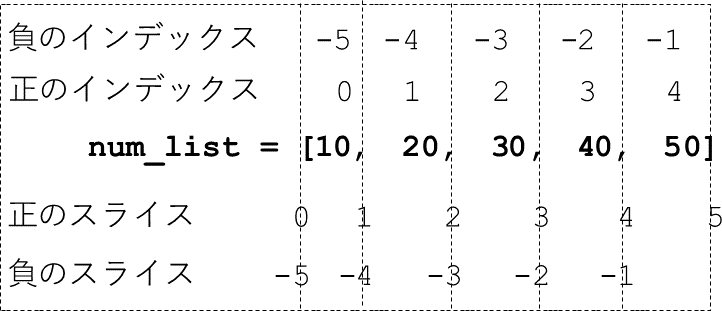

In [ ]:
num_list[1:4]

[20, 30, 40]

リストを格納した変数はコピーできます。ただし、コピーされるのは先頭要素のアドレスなので、メモリ上の実態は同じものを指します。別のリストを作成してコピーする場合は、a.copy() というメソッドを使います（リストが入れ子になっている場合はこの方法でもさらに注意が必要です）。

In [ ]:
a = [5, 8, 3]
b = a
print(b)
a[1] = 2
print(b)

[5, 8, 3]
[5, 2, 3]


In [ ]:
a = [5, 8, 3]
b = a.copy()
print(b)
a[1] = 2
print(b)

[5, 8, 3]
[5, 8, 3]


## タプル

タプルはカンマで区切られた要素を \() で囲ったものです。要素へのアクセスはインデックスによって行えますが、リストと違って要素の追加や変更はできません。リストのようにいつでも変更が可能なオブジェクトをミュータブル、タプルのように一度定義すると変更ができないオブジェクトをイミュータブルといいます。

In [ ]:
a = (2, 8, 7, 1, 5)
a[1]

8

In [ ]:
# タプルを書き換えようとしているのでエラーになる
a[1] = 3

TypeError: ignored

## 辞書

キーと値のペアで複数の要素をまとめる方法です。要素へはインデックスではなく、キーでアクセスできます。キーは文字列などのイミュータブルなオブジェクトでなければいけません。辞書自体は要素の追加・変更・削除ができるミュータブルなオブジェクトです。

In [ ]:
b = {'name': 'Tom Bean', 'age': 21, 'point':80}
b['name']

'Tom Bean'

# 制御構造

条件に応じて実行するプログラムを変えたり、繰り返したりする方法を制御構造とよびます。

## 条件分岐

week1のプログラム2を再掲します。

In [ ]:
%reset -f
# ニュートン法で平方根を近似する処理を3回行う
x = int(input('Enter integer>'))
rnew = float(x)

r1 = rnew
r2 = x/r1
rnew = (r1 + r2)/2
print(f'{r2:.5} < {rnew:.5} < {r1:.5}')

r1 = rnew
r2 = x/r1
rnew = (r1 + r2)/2
print(f'{r2:.5} < {rnew:.5} < {r1:.5}')

r1 = rnew
r2 = x/r1
rnew = (r1 + r2)/2
print(f'{r2:.5} < {rnew:.5} < {r1:.5}')

プログラム2では、負の数を入力されるとおかしな計算結果になります。また、0を入力されると0での除算（r2 = x/r1の行）が起こるので、プログラムが停止してしまいます。このような入力の誤りに対処するために、条件によってプログラムの実行箇所を変更できるif文を使って入力をチェックします。

条件が成立したときに実行したいコードはブロックとしてインデントを付けて書きます。同じインデントを持つ一連の行はブロックを構成します。

if文は条件不成立のときに実行するelseを書くことができます。elseの後に条件を書きたいときは else if ではなく elif を使います。

### プログラム3

プログラム2の入力部分のみを取り出し、値をチェックするようにしたものです。

In [ ]:
%reset -f
# 入力が正のときのみ、その値を表示して正常終了
import sys

x = int(input('Enter integer> '))
if x <= 0:
  print('Input error!')
  sys.exit()
print(x)

Enter integer> 3
3


## 繰り返し

### for文

一定回数を繰り返すfor文はrange関数を使ってループ変数を与えます。なお、繰り返し処理の内部では、繰り返しを強制的に中止するbreak文、残りの処理をスキップして次の繰り返しに移るcontinue文が使えます。

### プログラム4

for文を使うとプログラム2は以下のようになります（プログラム3の変更も組み入れています）。

In [ ]:
%reset -f
# ニュートン法で平方根を求める
import sys

x = int(input('Enter integer> '))
if x <= 0:
  print('Input error!')
  sys.exit()
rnew = float(x)

for i in range(3):
  r1 = rnew
  r2 = x/r1
  rnew = (r1 + r2)/2
  print(f'{r2:.5} < {rnew:.5} < {r1:.5}')

Enter integer> 3
1.0 < 2.0 < 3.0
1.5 < 1.75 < 2.0
1.7143 < 1.7321 < 1.75


リストの操作には主としてfor文を用います。

リストの定義には、要素を列挙する外延表記だけではなく、要素の性質を記述する内包表記が可能です。

In [ ]:
even_list = [i*2 for i in range(1, 11)]
even_list

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

リストの各要素についての処理は、ループ変数を必要としません。リストの先頭から順にひとつずつ要素を取り出してループ処理を行うというイメージです。

In [ ]:
num_list = [10, 20, 30, 40, 50]
for x in num_list:
  print(x)

10
20
30
40
50


インデックスを使う場合は以下のようにします。

In [ ]:
for i, x in enumerate(num_list):
  print(f'num_list[{i}] = {x}')

num_list[0] = 10
num_list[1] = 20
num_list[2] = 30
num_list[3] = 40
num_list[4] = 50


### while文

while文を使って条件が成立する間、処理を繰り返すことができます。

### プログラム5

while文を使って、2つの近似値が一定の差以下になるまで繰り返しています。なお、absは絶対値を求める組み込み関数です。


In [ ]:
%reset -f
# 2つの近似値が一定の差以下になるまで繰り返し
import sys

x = int(input('Enter integer> '))
if x <= 0:
  print('Input error!')
  sys.exit()
rnew = float(x)
diff = rnew - x/rnew

while diff > 1.0E-3:
  r1 = rnew
  r2 = x/r1
  rnew = (r1 + r2)/2
  diff = abs(r1 - r2)

print(f'{r2:.8} < {rnew:.8} < {r1:.8}')

Enter integer> 5
2.2360671 < 2.236068 < 2.2360689


# エラーへの対処

プログラム3では、0以下の値が入ってきたときのみ対処可能でした。しかし、このようにユーザに自由な入力を許す状況では数値以外のものが入力されてエラーとなる可能性もあります。たとえばこの平方根を求めるプログラムは正の浮動小数点数でも正しく動作するのですが、小数点 . （ピリオド）の代わりに間違って , （カンマ）を入力してしまうような状況があり得ます。

また、エラーが出たらプログラムを終了するのではなく、再度入力させるように変更した方がユーザにとっても使いやすいプログラムになります。

そのようなことを実現するために、エラーが起こりえるコードをtry以下のブロックで記述し、そこで発生した例外に対してexcept以下のブロックで対処する方法を使います。

### プログラム6

try文を使って例外を受け取ることで入力のエラーチェックを行います。

In [ ]:
%reset -f
# 入力が正しくなるまで繰り返し
import sys

while True:
  x = input('Enter positive number> ')
  try:
    x = float(x)
  except ValueError:
    print(f'{x}は数値に変換できません。')
    continue
  except:
    print('予期せぬエラーです')
    sys.exit()
  if x <= 0:
    print(f'{x}は正の数値ではありません。')
    continue
  break

print(x)

Enter positive number> -1
-1.0は正の数値ではありません。
Enter positive number> abc
abcは数値に変換できません。
Enter positive number> 3
3.0
